In [1]:
import os 
import numpy as np
import pandas as pd
from datetime import datetime

os.getcwd()

'C:\\Users\\rsasa\\OneDrive\\Documents\\Git\\data-science-analytics\\RFM_Modelling'

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'ecommerce-data.zip',
 'e_commerce_data.csv',
 'README.txt',
 'RFM_Modelling Notebook.ipynb']

## Loading DataFrames

In [3]:
df = pd.read_csv("e_commerce_data.csv",encoding = "ISO-8859-1")
df['Total Price'] = df['Quantity'] * df['UnitPrice']

In [4]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00


In [6]:
DateEx = '12/1/2010'
datetime.strptime(DateEx,'%d/%m/%Y').strftime("%Y%m%d")

'20100112'

[]

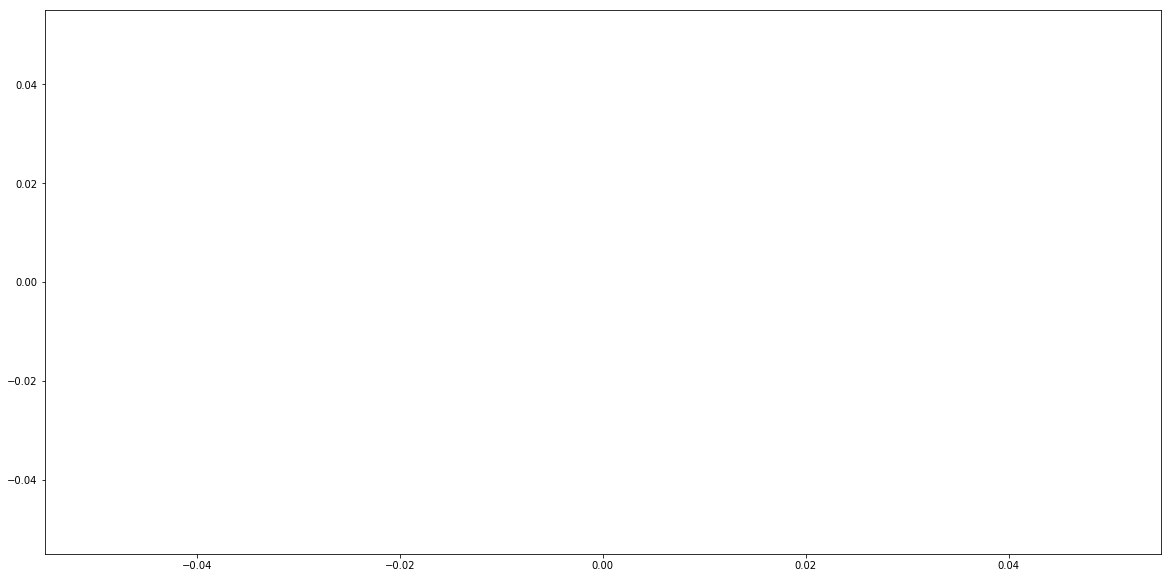

In [221]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
Safra = [datetime.strptime(date.split(" ")[0],'%m/%d/%Y').strftime("%Y%m%d") for date in df['InvoiceDate']]
ANOMES = [safrinha[0:6] for safrinha in Safra]
Graph_Invoice_SAFRA = pd.Series(ANOMES).value_counts()
plt.plot(x = Graph_Invoice_SAFRA.index,y = Graph_Invoice_SAFRA,)

In [9]:
df['Safra'] = [datetime.strptime(date.split(" ")[0],'%m/%d/%Y') for date in df['InvoiceDate']]

In [11]:
LastDay = datetime.strptime('01012012', "%d%m%Y").date()
df['Recencia'] = [(LastDay - datetime.strptime(date.split(" ")[0],'%m/%d/%Y').date()) for date in df['InvoiceDate']]
df['Recencia'] = [delta.days for delta in df['Recencia']]


R = df[['CustomerID','Recencia']].groupby("CustomerID",as_index = False).min()
FM = df[['CustomerID','Quantity','Total Price']].groupby("CustomerID",as_index = False).sum().round(2)

In [44]:
aux = df[['InvoiceNo','CustomerID','Quantity']].groupby(["CustomerID",'InvoiceNo'],as_index = False).count()
aux = aux[['CustomerID','InvoiceNo']].groupby("CustomerID",as_index = False).count().rename(columns = {'InvoiceNo':'Frequency'})

In [193]:
RM = pd.merge(R,FM,on = 'CustomerID')
RFM = pd.merge(RM,aux,on = 'CustomerID')
RFM = RFM[['CustomerID','Recencia','Total Price','Frequency']]
RFM = RFM[RFM['Total Price'] > 0]
RFM.head()

,CustomerID,Recencia,Total Price,Frequency
1,12347.0,25,4310.00,7
2,12348.0,98,1797.24,4
3,12349.0,41,1757.55,1
4,12350.0,333,334.40,1
5,12352.0,59,1545.41,11


In [194]:
def RFM_5_scores(df,col,inverse= False):
    '''Given a table and the columns, we assign the respective score according to quantiles
    df : name of Dataframe
    col : name of column
    inverse : It should be True just for Recency feature'''
    
    if(inverse == True):
        RFM_labels = [5,4,3,2,1]
    else:
        RFM_labels = [1,2,3,4,5]
    df.sort_values(by = col,inplace = True,ascending = True)
    df[col + '_Score'] = pd.qcut(df[col].rank(method='first'),[0, 0.2, 0.4, 0.6, 0.8, 1.] ,labels = RFM_labels)
    return df

In [195]:
RFM.rename(columns={'Total Price':'Monetary Value'},inplace=True)
RFM.rename(columns={'Recencia':'Recency'},inplace=True)
RFM_5_scores(RFM,'Recency',inverse = True)
RFM_5_scores(RFM,'Frequency')
RFM_5_scores(RFM,'Monetary Value')
RFM.groupby(['Recency_Score','Frequency_Score','Monetary Value_Score'],as_index = False).mean().round(2).drop('CustomerID',axis=1)

,Recency_Score,Frequency_Score,Monetary Value_Score,Recency,Monetary Value,Frequency
0,5,1,1,28.93,167.77,1.00
1,5,1,2,30.80,315.25,1.00
2,5,1,3,26.00,680.99,1.00
3,5,1,4,34.00,1201.49,1.00
4,5,1,5,25.00,3861.00,1.00
5,5,2,1,29.15,154.13,1.35
6,5,2,2,28.00,337.42,1.63
7,5,2,3,28.82,674.45,1.71
8,5,2,4,27.75,1372.13,2.00
9,5,2,5,NaN,NaN,NaN


In [196]:
RFM[['CustomerID','Recency_Score','Frequency_Score','Monetary Value_Score']].groupby(['Recency_Score','Frequency_Score','Monetary Value_Score'],as_index = False).count()

,Recency_Score,Frequency_Score,Monetary Value_Score,CustomerID
0,5,1,1,14.0
1,5,1,2,10.0
2,5,1,3,1.0
3,5,1,4,1.0
4,5,1,5,1.0
5,5,2,1,20.0
6,5,2,2,19.0
7,5,2,3,17.0
8,5,2,4,4.0
9,5,2,5,NaN


In [207]:
TotalGasto = RFM['Monetary Value'].sum()
RFM.sort_values(by = 'Monetary Value',ascending = False,inplace = True)
aux_gasto = RFM[['Monetary Value','Recency_Score','Frequency_Score','Monetary Value_Score']]
aux_gasto['Monetary Acumulado'] = np.cumsum(aux_gasto['Monetary Value'])
aux_gasto['Monetary Acumulado (%)'] = (aux_gasto['Monetary Acumulado']/TotalGasto)*100
Best_clients = aux_gasto[aux_gasto['Monetary Acumulado (%)'] < 80]
Important_clients = aux_gasto[aux_gasto['Monetary Acumulado (%)'] < 80].shape[0] 
Total_clients = aux_gasto.shape[0]
print( "Com "+ str(round((Important_clients/Total_clients)*100,2)) + "% da base de clientes, tenho 80% da receita")

Com 27.26% da base de clientes, tenho 80% da receita


C:\Users\rsasa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rsasa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [210]:
Best_clients.groupby(['Recency_Score','Frequency_Score','Monetary Value_Score'],as_index = False).count().dropna()

,Recency_Score,Frequency_Score,Monetary Value_Score,Monetary Value,Monetary Acumulado,Monetary Acumulado (%)
4,5,1,5,1.0,1.0,1.0
8,5,2,4,1.0,1.0,1.0
13,5,3,4,5.0,5.0,5.0
14,5,3,5,7.0,7.0,7.0
18,5,4,4,37.0,37.0,37.0
19,5,4,5,52.0,52.0,52.0
23,5,5,4,44.0,44.0,44.0
24,5,5,5,339.0,339.0,339.0
28,4,1,4,2.0,2.0,2.0
33,4,2,4,1.0,1.0,1.0


In [137]:
'''def jitter(a_series, noise_reduction=1000000):
    return (np.random.random(len(a_series))*a_series.std()/noise_reduction)-(a_series.std()/(2*noise_reduction))

def RFM_5_scores(df,col,inverse= False):
    if(inverse == True):
        RFM_labels = [5,4,3,2,1]
    else:
        RFM_labels = [1,2,3,4,5]
    df.sort_values(by = col,inplace = True,ascending = True)
    df[col + '_Score'] = pd.qcut(df[col] + jitter(df[col]),[0, 0.2, 0.4, 0.6, 0.8, 1.] ,labels = RFM_labels)
    return df'''